In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input, Embedding, LSTM,Dense

In [4]:
import networkx as nx

In [5]:
import torch

In [6]:
pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.6 MB/s eta 0:00:00


In [7]:
import torch

In [8]:
from torch_geometric.nn import GCNConv
from torch.nn import LSTM, Linear, Module

In [9]:
from IPython.display import HTML

In [10]:
file_path='/content/drive/MyDrive/Dataset.xlsx'
data= pd.read_excel(file_path)

In [11]:
with open("/content/drive/MyDrive/turkce-stop-words.txt", "r", encoding="utf-8") as file:
  turkish_stopwords = file.read().splitlines()

In [12]:
import re
import pandas as pd

In [13]:
def clean_text(text):
  #nan değerler için kontrol
  if pd.isna(text):
    return ""


    text = re.sub(r"https\S+", "", text)   # url leri temizle
    text = re.sub(r"@\w+", "", text)    # kullancı adlarını temizle
    text = re.sub(r"\W", "", text)


    # emojileri temizle
    emoji_pattern = re.compile("["

                               u"\U0001F600-\U0001F64F"  # emoticons

                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs

                               u"\U0001F680-\U0001F6FF"  # transport & map symbols

                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)

                               u"\U00002702-\U000027B0"

                               u"\U000024C2-\U0001F251"

                               "]+", flags= re.UNICODE)

    text = emojipattern.sub(r"",text)

    # metni küçük harflere çevirme
    text = text.lower()

    #durak kelimeleri kaldırma
    text = " ".join(word for word in text.split() if word not in
                    turkish_stopwords)

    #fazla boşlukları kaldırma
    text  = re.sub(r"\s+", " ", text).strip()


    return text

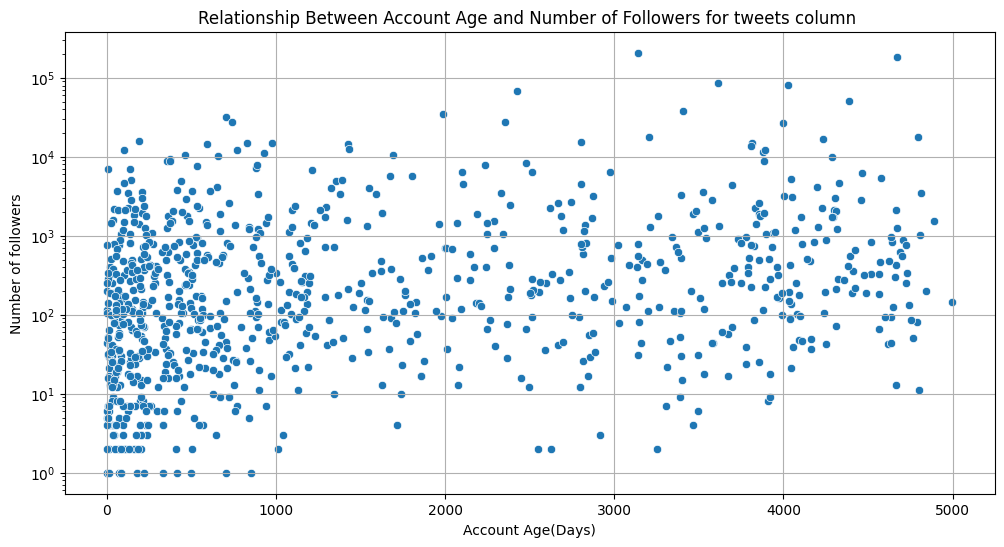

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

racist_tweets_analysis=data[data['label']==1][['date',
                                               'user_created',
                                              'user_followersCount']]

#Tarih sütünları datetime formatına dönüştürme
racist_tweets_analysis['date']=pd.to_datetime(racist_tweets_analysis['date'])
racist_tweets_analysis['user_created']=pd.to_datetime(racist_tweets_analysis['user_created'],errors='coerce')

#Tarih sütunları aynı zaman dilimlerine getirme
racist_tweets_analysis['date']=racist_tweets_analysis['date'].dt.tz_localize(None)
racist_tweets_analysis['user_created']=racist_tweets_analysis['user_created'].dt.tz_localize(None)

#hesabın kaç gün önce aççıldığını hesaplama
racist_tweets_analysis['account_age_days']=(racist_tweets_analysis['date']-racist_tweets_analysis['user_created']).dt.days

#hesap yaşı ve takipçi sayısına göre verilerşn dağılımını inceleme
plt.figure(figsize=(12,6))

#hesap yaşı ve takipçi sayısı arasındaki ilişkiyi gösteren bir scatter plot
sns.scatterplot(x='account_age_days',y='user_followersCount',
                 data=racist_tweets_analysis)
plt.xlabel('Account Age(Days)')
plt.ylabel('Number of followers')
plt.title('Relationship Between Account Age and Number of Followers for tweets column ')
plt.yscale('log')
plt.grid(True)
plt.show()

In [15]:
from datetime import datetime;

In [16]:
data['user_created_datetime']=pd.to_datetime(data['user_created'])

data[['user_created','user_created_datetime']].head()

,user_created,user_created_datetime
0,2020-11-10T20:48:28+00:00,2020-11-10 20:48:28+00:00
1,2021-12-23T12:31:59+00:00,2021-12-23 12:31:59+00:00
2,2021-02-01T21:51:04+00:00,2021-02-01 21:51:04+00:00
3,2011-01-27T07:36:38+00:00,2011-01-27 07:36:38+00:00
4,2020-04-04T21:26:13+00:00,2020-04-04 21:26:13+00:00


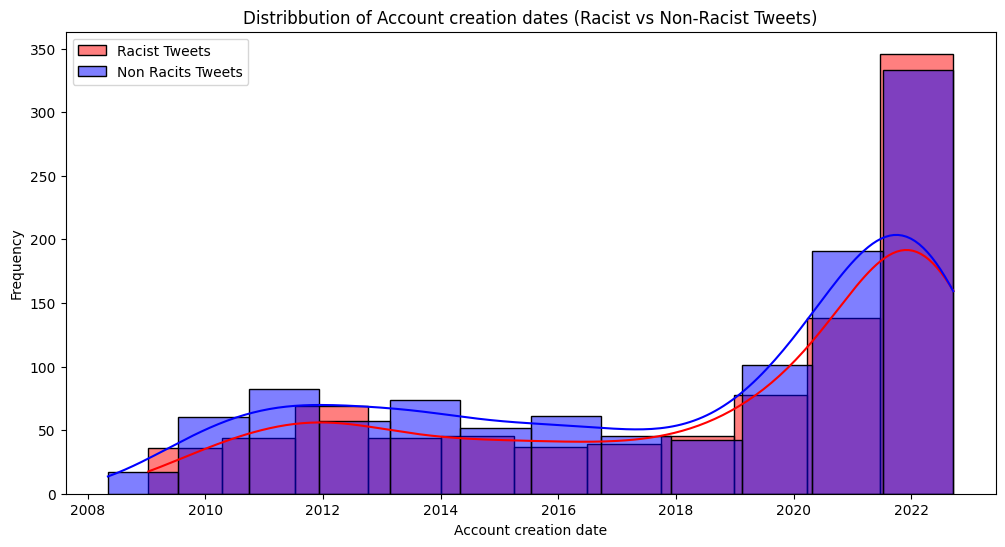

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

racist_tweets=data[data['label']==1]['user_created_datetime']
non_racits_tweets=data[data['label']==0]['user_created_datetime']

plt.figure(figsize=(12,6))
sns.histplot(racist_tweets, color="red", label="Racist Tweets", kde=True)
sns.histplot(non_racits_tweets, color="blue", label="Non Racits Tweets", kde=True)
plt.title('Distribbution of Account creation dates (Racist vs Non-Racist Tweets)')
plt.xlabel('Account creation date')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [20]:
sample_0 = data[data['label'] == 0].sample(4)
sample_1 = data[data['label'] == 1].sample(4)

sampled_data = pd.concat([sample_0, sample_1])

content_label_table = sampled_data[['content', 'label']]

html_table = content_label_table.to_html(index=False, escape=False, border=1)
HTML(html_table)

content,label
"@Drtulinoygur Çocukları korumak istiyorsanız, onları bu söyleminizden korumakla başlayın işe! Ne yapmış lgbti bireler? Camınızı taşladılar? Bir lezbiyen size tecavüz mü etti? Yahu bu 1 yönelim ve istedikleri gibi yaşamı yaşama haklari var. Irkçılık ile cinsiyetlik aynı seydir. Yani faşizm!",0
@denizhatun11 @umitozdag @zaferpartisi Oy verdim. Türküm müslümanım.\nÖtekileştirmeye devam edin hangi birimizin oyu ötekileştirmeyle başka bir partiye kayar acaba???\nMülteciler ve ırkçılık dışında tek bir proje ve vizyon sahibi değil bu adam uyanın.,0
Polonya ve Baltık ülkeleri Rus vatandaşlarına sınırlarını kapattı https://t.co/KrPs60QuhU # #Dünya #,0
"@myen1010 Ben bir Kürt milliyetçi siyim, insan olan herkesi severim solcuları bir ayrı severim fakat bu yaptıkları çok nahoş bir durum bence",0
@bayanteror Erkeklere bela okumayın bela okunacak birileri varsa o da bu ülke içerisindeki tüm erkekler buna mülteciler de dahil. Çünkü sanmıyorum batı ülkelerinde sapık ya da şizofren olmadığı sürece böyle şeyler yapacak insanların olduğunu. SEBEP;\n1. Görmemişlik yok\n2. Yasalar caydırıcı,1
"@ByUgurAcar Adam yatıyor kalkıyor sığınmacılar gitsin diyor. Kafkasyadan Rus zulmünden kaçarak, Türkiye’ye sığınmış göçmen bir ailenin çocuğu özdağ.. Eziyetten kaçarak bu topraklara sığınmış insanlara düşmanlık yapması mantıkla izah edilemez.\n\nBİR BİLMECEMİZ VAR\n#OperasyonÇocuğuKim",1
@tcedebiyats @sbhtglr Onlar bu milletin partisi değil demekki. Acaba hangi millete hiç yalan söylemediler. Yahudiler olabilir 😏,1
"@Davit_arm @GoldenTent @willhailer @AnonymousLeftie @SpeakerPelosi bir kişiye akıl verecek son milletler bunlar. afrikada fransız katliamları,avrupada alman katliamları,amerika - vietnam,hiroşima,nagazaki atom bombaları,amerika yerli nüfüsu,rusların stalin ile birlikte milyonları öldürdüğünü unuttun sanırım verdiğin örnek bile saçma",1


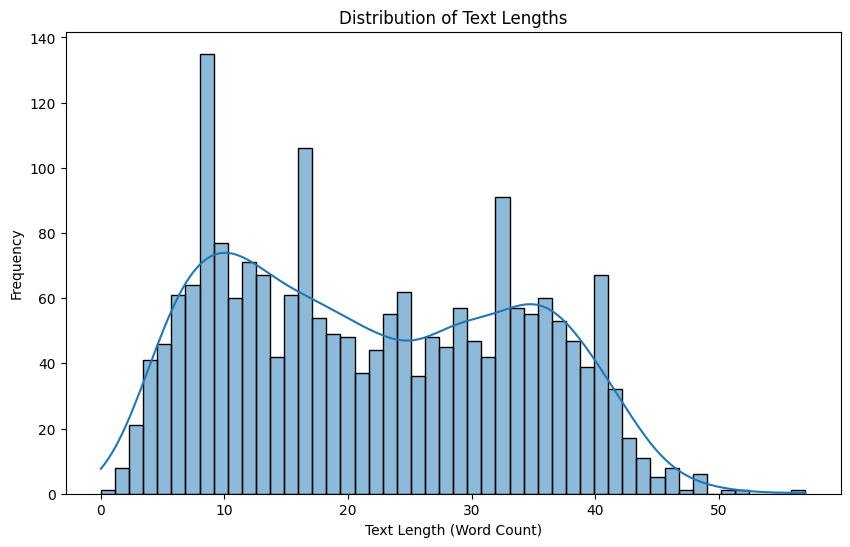

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

data['content_length'] = data['content'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

plt.figure(figsize=(10,6))
sns.histplot(data['content_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (Word Count)')
plt.ylabel('Frequency')  # corrected typo here
plt.show()

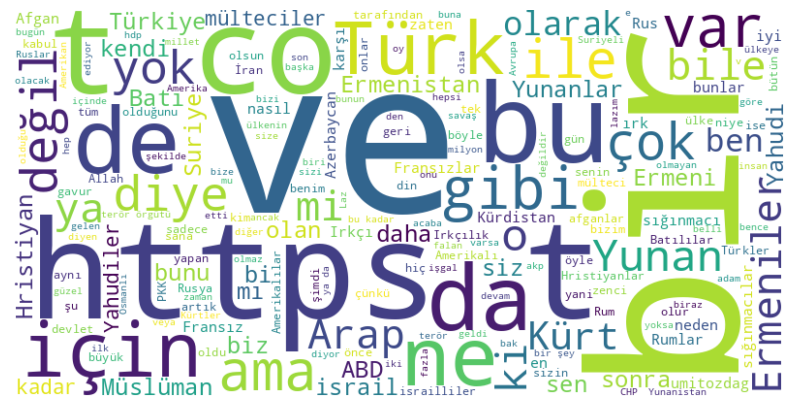

In [26]:
from wordcloud import WordCloud

all_text = ' '.join([str(text) for text in data['content'] if pd.notnull(text)])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
